In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/weather contest')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plant1 = pd.read_csv('plant1_train.csv')
print(plant1.shape)
plant1.head()

(58749, 16)


,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,1,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0
1,2,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0.0,0.0,0.0
2,3,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0.0,0.0,0.0
3,4,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0.0,0.0,0.0
4,5,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0.0,0.0,0.0


In [5]:
test = pd.read_csv('plant_test.csv')

test.head()

,Unnamed: 0,plant_test.mea_ddhr,plant_test.plant,plant_test.loc,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1,plant_test.x24h_tma,plant_test.x24h_cond_loc,plant_test.x48h_tma,plant_test.x48h_cond_loc
0,1,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,3,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,4,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,5,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


# date type으로 변경

In [0]:
import datetime
a= plant1['plant1_train.mea_ddhr'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M'))
plant1['datetime'] =a

In [7]:
pd.DatetimeIndex(plant1['datetime']).year.value_counts()

2018    34939
2019    12960
2017     8600
2016     2250
Name: datetime, dtype: int64

- 2018년 데이터가 가장 많음

# location별 데이터분리

- loc별로 독립적인 모델을 개발하랬으므로 분리

In [0]:
plant1

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,datetime
0,1,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0,2016-04-01 00:00:00
1,2,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0,2016-04-01 03:00:00
2,3,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0,2016-04-01 06:00:00
3,4,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0,2016-04-01 09:00:00
4,5,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0,2016-04-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,58745,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0,2019-03-31 23:10:00
58745,58746,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0,2019-03-31 23:20:00
58746,58747,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0,2019-03-31 23:30:00
58747,58748,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0,2019-03-31 23:40:00


In [0]:
loc1 = plant1[['datetime','plant1_train.tem_in_loc1','plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','plant1_train.cond_loc1']]
loc1.head(2)

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1
0,2016-04-01 00:00:00,16.0,24.0,11.0,0.0
1,2016-04-01 03:00:00,14.0,28.0,10.0,0.0


In [0]:
loc2 = plant1[['datetime','plant1_train.tem_in_loc2','plant1_train.hum_in_loc2','plant1_train.tem_coil_loc2','plant1_train.cond_loc2']]
loc2.head(2)

,datetime,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.cond_loc2
0,2016-04-01 00:00:00,14.0,23.0,11.0,0.0
1,2016-04-01 03:00:00,12.0,32.0,9.0,0.0


In [0]:
loc3 = plant1[['datetime','plant1_train.tem_in_loc3','plant1_train.hum_in_loc3','plant1_train.tem_coil_loc3','plant1_train.cond_loc3']]
loc3.head(2)

,datetime,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.cond_loc3
0,2016-04-01 00:00:00,13.0,32.0,10.0,0.0
1,2016-04-01 03:00:00,11.0,42.0,7.0,0.0


In [0]:
plant1.head(1)

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,datetime
0,1,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0,2016-04-01


# EDA

## 결로가 발생한 구간

### 결로가 발생한 시간

- 결로가 한번이라도 발생했으면 count
- 총 275개의 데이터

In [0]:
cond_df = plant1[(plant1['plant1_train.cond_loc1'] ==1 ) | (plant1['plant1_train.cond_loc1'] ==1 ) | (plant1['plant1_train.cond_loc1'] ==1 )]
cond_df.shape

(275, 17)

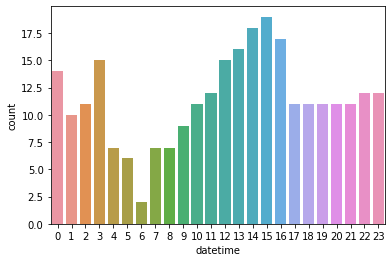

In [0]:
sns.countplot(pd.DatetimeIndex(cond_df['datetime']).hour)

- 결로는 15시에 가장 많이 발생
- 15시 주변시간도 발생빈도가 높으므로 낮 시간대에 많이 발생했다고 볼 수 있음




In [0]:
pd.DatetimeIndex(cond_df['datetime']).hour.value_counts()

15    19
14    18
16    17
13    16
3     15
12    15
0     14
22    12
23    12
11    12
17    11
18    11
19    11
20    11
10    11
21    11
2     11
1     10
9      9
8      7
7      7
4      7
5      6
6      2
Name: datetime, dtype: int64

In [0]:
a= cond_df[pd.DatetimeIndex(cond_df['datetime']).hour==15]
print(a.shape)
a

(19, 17)


,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,datetime
10649,10650,2017-12-23 15:00,9.57,70.45,5.22,8.78,72.74,4.26,8.47,75.12,3.57,8.84,68.62,1.0,1.0,1.0,2017-12-23 15:00:00
12353,12354,2018-03-04 15:00,13.69,78.27,8.99,12.84,79.15,8.04,12.78,83.64,7.39,13.33,76.77,1.0,1.0,1.0,2018-03-04 15:00:00
12569,12570,2018-03-13 15:00,15.28,67.83,10.18,14.55,69.08,8.95,15.43,67.06,9.79,15.80,64.35,1.0,1.0,1.0,2018-03-13 15:00:00
13040,13041,2018-03-27 15:00,14.88,66.42,9.53,14.37,67.77,9.45,14.85,65.78,9.26,18.58,49.54,1.0,0.0,1.0,2018-03-27 15:00:00
13041,13042,2018-03-27 15:30,14.95,66.48,9.53,14.76,66.70,9.60,15.16,64.59,9.34,18.12,50.73,1.0,0.0,1.0,2018-03-27 15:30:00
15440,15441,2018-05-16 15:00,24.62,81.20,22.04,24.47,81.59,21.43,23.98,83.39,21.16,23.89,83.21,1.0,1.0,1.0,2018-05-16 15:00:00
15441,15442,2018-05-16 15:30,24.62,81.50,22.08,24.44,82.08,21.51,23.98,84.40,21.20,23.83,82.91,1.0,1.0,1.0,2018-05-16 15:30:00
41845,41846,2018-12-03 15:00,13.51,88.22,9.34,13.14,89.47,9.34,13.21,91.64,9.79,14.67,90.81,1.0,1.0,1.0,2018-12-03 15:00:00
41846,41847,2018-12-03 15:10,13.54,88.34,9.34,13.17,89.38,9.41,13.24,92.12,9.76,14.64,90.75,1.0,1.0,1.0,2018-12-03 15:10:00
41847,41848,2018-12-03 15:20,13.63,88.52,9.41,13.21,89.56,9.41,13.30,92.09,9.76,14.73,90.81,1.0,1.0,1.0,2018-12-03 15:20:00


In [0]:
cond_df[pd.DatetimeIndex(cond_df['datetime']).hour==6]

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,datetime
610,611,2016-06-16 6:00,23.00,74.00,19.0,22.00,78.00,23.0,22.0,82.00,23.00,22.00,84.0,1.0,0.0,0.0,2016-06-16 06:00:00
11192,11193,2018-01-15 6:00,6.25,76.28,1.9,5.63,80.77,0.9,5.3,83.15,0.14,5.05,81.2,1.0,1.0,1.0,2018-01-15 06:00:00


In [0]:
t1 =23
t2 = 19
hum = 74
a= (6.11 * (10)**((7.5*t1)/(t1+237.3))) /10
b= (6.11 * (10)**((7.5*t2)/(t2+237.3))) /10
now_vr = (a*hum)/ 100
now_vr


2.0795521610878778

In [0]:
b

2.1980131459846106

### 결로가 많이 발생한 달

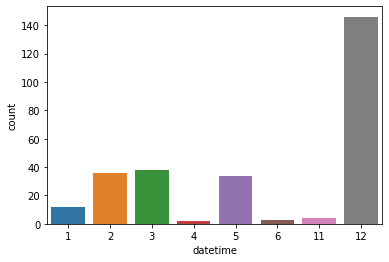

In [0]:
sns.countplot(pd.DatetimeIndex(cond_df['datetime']).month)

- 12월에 결로가 많이 발생


### 결로가 많이 발생한 연도

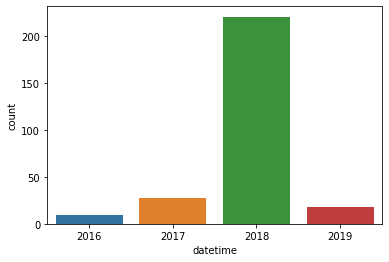

In [0]:
sns.countplot(pd.DatetimeIndex(cond_df['datetime']).year)

- 18년도에 결로가 많이 발생함. 
- 애초에 18년도 데이터가 가장 많았으므로 2018년에 결로가 많았다고 보긴 어렵다.  

In [0]:
##

## 포화 수증기압 이용

포화 수증기압 공식

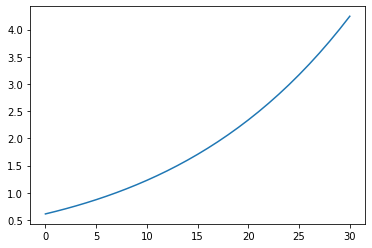

In [0]:
x = []
y = []
for i in range(0,31) :
    t = i
    a= (6.11 * (10)**((7.5*t)/(t+237.3))) /10
    x.append(t)
    y.append(a)

plt.plot(x,y)

In [0]:
x[10],y[10]

(10, 12.283343142218987)

### 포화 수증기압 (saturated water vapor) 함수

In [0]:
def swv(t1_df,t2_df,hum_df) :
    
    loc_swv = t1_df.apply(lambda t1 : (6.11 * (10)**((7.5*t1)/(t1+237.3))) /10)
    coil_swv = t2_df.apply(lambda t2 :(6.11 * (10)**((7.5*t2)/(t2+237.3))) /10 )
    now_vr = (loc_swv*hum_df) / 100

    # loc_swv = (6.11 * (10)**((7.5*t1)/(t1+237.3))) /10
    # coil_swv = (6.11 * (10)**((7.5*t2)/(t2+237.3))) /10
    # now_vr = (loc_swv*hum)/ 100
    # return 0 if (coil_swv - now_vr ) >0 else 1
    
    
    return coil_swv- now_vr

### swv 함수를 이용한 loc1 결로 검증

In [0]:
a=swv(loc1['plant1_train.tem_in_loc1'],loc1['plant1_train.tem_coil_loc1'],loc1['plant1_train.hum_in_loc1'])

In [0]:
b = a.apply(lambda x :0 if x>0 else 1)

In [0]:
loc1['swv_value']= a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:

loc1['cond_with_swv'] = b

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
val_swv = loc1[(loc1['cond_with_swv']==1)&(loc1['plant1_train.cond_loc1'].notnull())]

In [0]:
val_swv.shape

(154, 6)

In [0]:
val_swv[val_swv['plant1_train.cond_loc1']==0]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv


In [0]:
loc1.loc[(loc1['plant1_train.cond_loc1']==1)& (loc1['cond_with_swv']==0) & (loc1['swv_value']>=0.1)] 

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value
610,2016-06-16 06:00:00,23.00,74.00,19.00,1.0,0,0.118461
15429,2018-05-16 09:30:00,24.77,79.21,21.85,1.0,0,0.144885
15430,2018-05-16 10:00:00,24.71,79.73,21.85,1.0,0,0.137540
15431,2018-05-16 10:30:00,24.77,80.07,21.93,1.0,0,0.130826
15432,2018-05-16 11:00:00,24.68,79.82,21.85,1.0,0,0.139185
15433,2018-05-16 11:30:00,24.65,80.22,21.89,1.0,0,0.137617
15434,2018-05-16 12:00:00,24.62,79.88,21.89,1.0,0,0.152605
15436,2018-05-16 13:00:00,24.65,80.01,21.93,1.0,0,0.150550
15437,2018-05-16 13:30:00,24.74,80.19,22.04,1.0,0,0.149275
15438,2018-05-16 14:00:00,24.80,80.59,22.04,1.0,0,0.127778


- 코일의 포화수증기량 - 실제 수증기량을 통해 cond_with_swv 변수 도출
- cond_with_swv 변수는 결로가 발생했는지 여부이며 cond 변수와 값이 일치해야한다. 
- cond 결로 값 총 275개 , cond_with_swv 결로 값 총 154개로 절반 이상은 맞춤
- 코일의 포화수증기량 - 실제 수증기량에 오차범위를 둬서 더 많은 경우에 결로에 해당하도록 해야할 듯  
- 0.15 안쪽으로 대다수의 불일치 값이 존재한다.


In [0]:
plant1.head(0)

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,datetime


In [0]:
swv(plant1['plant1_train.tem_in_loc1'],plant1['plant1_train.tem_coil_loc1'],plant1['plant1_train.hum_in_loc1'])

ValueError: ignored

## 24, 48시간 후 결로 여부 

In [0]:
loc1.head(1)

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value
0,2016-04-01,16.0,24.0,11.0,0.0,0,0.876594


In [0]:
loc1[(loc1['datetime'] >='2016-04-01') & (loc1['datetime']<='2016-12-26 21:00')]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value
0,2016-04-01 00:00:00,16.0,24.0,11.0,0.0,0,0.876594
1,2016-04-01 03:00:00,14.0,28.0,10.0,0.0,0,0.780594
2,2016-04-01 06:00:00,13.0,33.0,10.0,0.0,0,0.733924
3,2016-04-01 09:00:00,13.0,33.0,10.0,0.0,0,0.733924
4,2016-04-01 12:00:00,16.0,28.0,10.0,0.0,0,0.719067
...,...,...,...,...,...,...,...
2123,2016-12-26 09:00:00,NaN,NaN,NaN,NaN,1,NaN
2124,2016-12-26 12:00:00,NaN,NaN,NaN,NaN,1,NaN
2125,2016-12-26 15:00:00,NaN,NaN,NaN,NaN,1,NaN
2126,2016-12-26 18:00:00,NaN,NaN,NaN,NaN,1,NaN


In [0]:
cond_diff_df = pd.DataFrame()
cond_diff_df['datetime'] = loc1['datetime']
cond_diff_df['24h_cond'] =  loc1['plant1_train.cond_loc1'].shift(-24)
cond_diff_df['now_cond'] = loc1['plant1_train.cond_loc1']
# cond_diff_df['48h_cond'] = loc1['plant1_train.cond_loc1'].shift(-48)

In [0]:
cond_diff_df

,24h_cond,now_cond,48h_cond
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
58744,NaN,0.0,NaN
58745,NaN,0.0,NaN
58746,NaN,0.0,NaN
58747,NaN,0.0,NaN


In [0]:
cond_diff_df[(cond_diff_df['now_cond']==0) & (cond_diff_df['24h_cond']!=0)]

,24h_cond,now_cond,48h_cond
68,1.0,0.0,0.0
96,1.0,0.0,0.0
217,1.0,0.0,0.0
233,1.0,0.0,0.0
584,1.0,0.0,0.0
...,...,...,...
58744,NaN,0.0,NaN
58745,NaN,0.0,NaN
58746,NaN,0.0,NaN
58747,NaN,0.0,NaN


In [0]:
loc1.loc[68]

datetime                      2016-04-09 12:00:00
plant1_train.tem_in_loc1                       16
plant1_train.hum_in_loc1                       68
plant1_train.tem_coil_loc1                     14
plant1_train.cond_loc1                          0
cond_with_swv                                   0
swv_value                                0.362282
Name: 68, dtype: object

## ETC

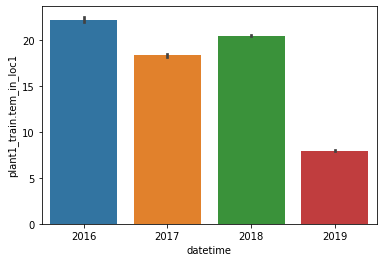

In [0]:
sns.barplot(x= pd.DatetimeIndex(plant1['datetime']).year,y= plant1['plant1_train.tem_in_loc1'])

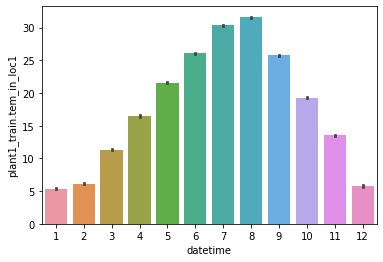

In [0]:
sns.barplot(x= pd.DatetimeIndex(plant1['datetime']).month,y= plant1['plant1_train.tem_in_loc1'])

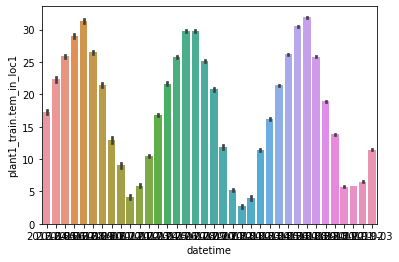

In [0]:
sns.barplot(x= pd.to_datetime(plant1['datetime']).dt.to_period('M'),y= plant1['plant1_train.tem_in_loc1'])

## loc1,2,3 전처리 함수

- date 별 측정시간 나누기


In [0]:
def loc_func(location):
    # loc_3hour = loc[(loc['datetime'] >= '2016-04-01') & (loc['datetime']<='2016-12-26 21:00')]
    # loc_1hour = loc1[(loc1['datetime'] >= '2016-12-26 22:00') & (loc1['datetime']<='2018-03-22')]
    # loc_30m = loc1[(loc1['datetime'] >= '2018-03-22 0:00') & (loc1['datetime']<='2018-06-12')]
    # loc_10m = loc1[(loc1['datetime'] >= '2018-06-12 0:00') & (loc1['datetime']<='2019-03-31 23:50')]
    
    # 24h 후 date column 생성
    location['24h_datetime']  =location['datetime'] + datetime.timedelta(hours=24)
    
    # 48h 후 date column 생성
    location['48h_datetime']  =location['datetime'] + datetime.timedelta(hours=48)

    cond_lists = []
    
    for i in location['24h_datetime']:
        # try :
            # print( loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].notnull().bool())
        if location.loc[location['datetime']==i,'plant1_train.cond_loc1'].notnull().any():
            cond_lists.append(location.loc[location['datetime']==i,'plant1_train.cond_loc1'].item())
        else: 
            cond_lists.append(-1)
        # except :
            # print(loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].item())    
    

    

In [0]:
# import threading
# import concurrent
# from time import time

# s = time()




# def tests(dt):
#     lists = []
    
#         # try :
#             # print( loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].notnull().bool())
#     if loc1.loc[loc1['datetime']==dt,'plant1_train.cond_loc1'].notnull().any():
#         lists.append(loc1.loc[loc1['datetime']==dt,'plant1_train.cond_loc1'].item())
#     else: 
#         lists.append(-1)
#         # except :
#         #     print(loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].item())   
    
#     return lists



# lists1 = []
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     x=  [executor.submit(tests,dt) for dt in loc1['24h_datetime']]

#     for i in x.result():
#         lists1.append(i)
# print(time()-s,'초')

Exception ignored in: <function ThreadPoolExecutor._adjust_thread_count.<locals>.weakref_cb at 0x7fe7ebb8a6a8>
Traceback (most recent call last):
  File "/usr/lib/python3.6/concurrent/futures/thread.py", line 131, in weakref_cb
    q.put(None)
  File "/usr/lib/python3.6/queue.py", line 126, in put
    with self.not_full:
  File "/usr/lib/python3.6/threading.py", line 240, in __enter__
    return self._lock.__enter__()
KeyboardInterrupt
Exception ignored in: <function ThreadPoolExecutor._adjust_thread_count.<locals>.weakref_cb at 0x7fe7ebb8ab70>
Traceback (most recent call last):
  File "/usr/lib/python3.6/concurrent/futures/thread.py", line 131, in weakref_cb
    q.put(None)
  File "/usr/lib/python3.6/queue.py", line 126, in put
    with self.not_full:
  File "/usr/lib/python3.6/threading.py", line 240, in __enter__
    return self._lock.__enter__()
KeyboardInterrupt
Exception ignored in: <function ThreadPoolExecutor._adjust_thread_count.<locals>.weakref_cb at 0x7fe7ebb8a730>
Traceback

In [0]:
a= 'plant1'


strs = a+ '_train.tem_in_'+
strs


'plant1_train.tem_in_loc1'

In [0]:
loc1[(loc1['datetime'] >= '2016-04-01') & (loc1['datetime']<='2016-12-26 22:00')]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime
0,2016-04-01 00:00:00,16.0,24.0,11.0,0.0,0,0.876594,2016-04-02 00:00:00
1,2016-04-01 03:00:00,14.0,28.0,10.0,0.0,0,0.780594,2016-04-02 03:00:00
2,2016-04-01 06:00:00,13.0,33.0,10.0,0.0,0,0.733924,2016-04-02 06:00:00
3,2016-04-01 09:00:00,13.0,33.0,10.0,0.0,0,0.733924,2016-04-02 09:00:00
4,2016-04-01 12:00:00,16.0,28.0,10.0,0.0,0,0.719067,2016-04-02 12:00:00
...,...,...,...,...,...,...,...,...
2124,2016-12-26 12:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-12-27 12:00:00
2125,2016-12-26 15:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-12-27 15:00:00
2126,2016-12-26 18:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-12-27 18:00:00
2127,2016-12-26 21:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-12-27 21:00:00


In [0]:
# 2016-12-26 22:00 ~ 2018-03-22 0:00

# loc1[(loc1['datetime'] >= '2016-12-26 22:00') & (loc1['datetime']<='2018-03-22')]

In [0]:
# 2018-03-22 0:30 ~ 2018-06-12 0:00
# loc1[(loc1['datetime'] >= '2018-03-22 0:00') & (loc1['datetime']<='2018-06-12')]

In [0]:
# # 2018-06-12 0:10 ~ 2020-03-31 23:50
# a= loc1[(loc1['datetime'] >= '2018-06-12 0:00') & (loc1['datetime']<='2019-03-31 23:50')]
# a['test'] = a['plant1_train.cond_loc1'].shift(-144)
# a

In [0]:

loc1['24h_datetime']  =loc1['datetime'] + datetime.timedelta(hours=24)

# loc1['h_datetime']  =loc1['datetime'] + datetime.timedelta(hours=48)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
loc1.loc[loc1['datetime']=='2016-04-02','plant1_train.cond_loc1'].notnull().any()
    

True

In [0]:
lists = []
for i in loc1['24h_datetime']:
    try :
        # print( loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].notnull().bool())
        if loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].notnull().any():
            lists.append(loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].item())
        else: 
            lists.append(-1)
    except :
        print(loc1.loc[loc1['datetime']==i,'plant1_train.cond_loc1'].item())    

In [0]:
loc1['24h_cond'] = lists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
loc1['datetime']>= ''

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
0,2016-04-01 00:00:00,16.00,24.00,11.00,0.0,0,0.876594,2016-04-02 00:00:00,0.0
1,2016-04-01 03:00:00,14.00,28.00,10.00,0.0,0,0.780594,2016-04-02 03:00:00,0.0
2,2016-04-01 06:00:00,13.00,33.00,10.00,0.0,0,0.733924,2016-04-02 06:00:00,0.0
3,2016-04-01 09:00:00,13.00,33.00,10.00,0.0,0,0.733924,2016-04-02 09:00:00,0.0
4,2016-04-01 12:00:00,16.00,28.00,10.00,0.0,0,0.719067,2016-04-02 12:00:00,0.0
...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10:00,10.52,36.39,10.52,0.0,0,0.808989,2019-04-01 23:10:00,-1.0
58745,2019-03-31 23:20:00,10.52,37.09,10.44,0.0,0,0.793314,2019-04-01 23:20:00,-1.0
58746,2019-03-31 23:30:00,10.43,37.18,10.56,0.0,0,0.805173,2019-04-01 23:30:00,-1.0
58747,2019-03-31 23:40:00,10.49,38.00,10.56,0.0,0,0.792879,2019-04-01 23:40:00,-1.0


In [0]:
loc1.to_csv('plant1_loc1.csv',index=False)


In [6]:
loc1 = pd.read_csv('plant1_loc1.csv')
print(loc1.shape)
loc1.head()

(58749, 9)


,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
0,2016-04-01 00:00:00,16.0,24.0,11.0,0.0,0,0.876594,2016-04-02 00:00:00,0.0
1,2016-04-01 03:00:00,14.0,28.0,10.0,0.0,0,0.780594,2016-04-02 03:00:00,0.0
2,2016-04-01 06:00:00,13.0,33.0,10.0,0.0,0,0.733924,2016-04-02 06:00:00,0.0
3,2016-04-01 09:00:00,13.0,33.0,10.0,0.0,0,0.733924,2016-04-02 09:00:00,0.0
4,2016-04-01 12:00:00,16.0,28.0,10.0,0.0,0,0.719067,2016-04-02 12:00:00,0.0


In [13]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58749 entries, 0 to 58748
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datetime                    58749 non-null  object 
 1   plant1_train.tem_in_loc1    57879 non-null  float64
 2   plant1_train.hum_in_loc1    57879 non-null  float64
 3   plant1_train.tem_coil_loc1  57879 non-null  float64
 4   plant1_train.cond_loc1      57879 non-null  float64
 5   cond_with_swv               58749 non-null  int64  
 6   swv_value                   57879 non-null  float64
 7   24h_datetime                58749 non-null  object 
 8   24h_cond                    58749 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.0+ MB


24h 값이 제대로 들어갔는지 확인

In [0]:
date_df = pd.DataFrame(loc1['datetime'],columns=['datetime'])
date_df['cond_loc1'] = loc1['plant1_train.cond_loc1']

In [0]:
date_df2 = pd.DataFrame(loc1['24h_datetime'])
date_df2.rename({'24h_datetime':'datetime'},axis=1,inplace=True)
date_df2['24h_cond'] = loc1['24h_cond']
# date_df2

In [0]:
a= pd.merge(date_df,date_df2,how='right',on='datetime',)

In [0]:
b= a[a['cond_loc1'].notnull()]

swv값 검증

In [9]:
loc1[loc1['swv_value']<= 0]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
92,2016-04-12 12:00:00,18.00,78.00,14.00,1.0,1,-0.011295,2016-04-13 12:00:00,0.0
608,2016-06-16 00:00:00,24.00,78.00,19.00,1.0,1,-0.130074,2016-06-17 00:00:00,0.0
2089,2016-12-22 03:00:00,14.09,87.76,11.51,1.0,1,-0.053273,2016-12-23 03:00:00,-1.0
3367,2017-02-16 19:00:00,11.62,72.99,6.09,1.0,1,-0.057413,2017-02-17 19:00:00,0.0
3368,2017-02-16 20:00:00,11.83,74.66,6.02,1.0,1,-0.099085,2017-02-17 20:00:00,0.0
...,...,...,...,...,...,...,...,...,...
41922,2018-12-04 03:50:00,12.75,85.56,10.02,1.0,1,-0.031078,2018-12-05 03:50:00,0.0
41923,2018-12-04 04:00:00,12.66,85.47,9.98,1.0,1,-0.025632,2018-12-05 04:00:00,0.0
41924,2018-12-04 04:10:00,12.69,85.26,10.06,1.0,1,-0.018423,2018-12-05 04:10:00,0.0
41925,2018-12-04 04:20:00,12.47,85.10,10.02,1.0,1,-0.001464,2018-12-05 04:20:00,0.0


In [15]:
max(loc1.loc[(loc1['plant1_train.cond_loc1'] ==1) & (loc1['cond_with_swv']!=1),'swv_value'])

0.15417223159470694

- swv가 양수일 때 결로가 발생한 값 중, 최대값 : 0.15417

In [14]:
loc1[(loc1['plant1_train.cond_loc1'] !=1) & (loc1['cond_with_swv']==1)]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
768,2016-07-06 00:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-07-07 00:00:00,0.0
977,2016-08-01 03:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-08-02 03:00:00,0.0
978,2016-08-01 06:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-08-02 06:00:00,0.0
979,2016-08-01 09:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-08-02 09:00:00,0.0
1308,2016-09-11 12:00:00,NaN,NaN,NaN,NaN,1,NaN,2016-09-12 12:00:00,0.0
...,...,...,...,...,...,...,...,...,...
48236,2019-01-17 23:50:00,NaN,NaN,NaN,NaN,1,NaN,2019-01-18 23:50:00,-1.0
48380,2019-01-18 23:50:00,NaN,NaN,NaN,NaN,1,NaN,2019-01-19 23:50:00,-1.0
48524,2019-01-19 23:50:00,NaN,NaN,NaN,NaN,1,NaN,2019-01-20 23:50:00,-1.0
48668,2019-01-20 23:50:00,NaN,NaN,NaN,NaN,1,NaN,2019-01-21 23:50:00,-1.0


## 현재 발생한 결로가 24h, 48h에 영향을 미치는 지

In [16]:
loc1.head()

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
0,2016-04-01 00:00:00,16.0,24.0,11.0,0.0,0,0.876594,2016-04-02 00:00:00,0.0
1,2016-04-01 03:00:00,14.0,28.0,10.0,0.0,0,0.780594,2016-04-02 03:00:00,0.0
2,2016-04-01 06:00:00,13.0,33.0,10.0,0.0,0,0.733924,2016-04-02 06:00:00,0.0
3,2016-04-01 09:00:00,13.0,33.0,10.0,0.0,0,0.733924,2016-04-02 09:00:00,0.0
4,2016-04-01 12:00:00,16.0,28.0,10.0,0.0,0,0.719067,2016-04-02 12:00:00,0.0


In [21]:
loc1[(loc1['24h_cond'] ==1)]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
84,2016-04-11 12:00:00,16.00,46.00,14.00,0.0,0,0.762420,2016-04-12 12:00:00,1.0
112,2016-04-15 00:00:00,16.00,50.00,12.00,0.0,0,0.493576,2016-04-16 00:00:00,1.0
233,2016-04-30 03:00:00,21.00,64.00,18.00,0.0,0,0.472451,2016-05-01 03:00:00,1.0
249,2016-05-02 03:00:00,21.00,64.00,18.00,0.0,0,0.472451,2016-05-03 03:00:00,1.0
600,2016-06-15 00:00:00,25.00,68.00,25.00,0.0,0,1.013962,2016-06-16 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...
50493,2019-02-02 16:00:00,8.08,48.63,5.10,0.0,0,0.353997,2019-02-03 16:00:00,1.0
50494,2019-02-02 16:10:00,8.20,48.29,5.14,0.0,0,0.355849,2019-02-03 16:10:00,1.0
50495,2019-02-02 16:20:00,8.23,47.89,5.22,0.0,0,0.364064,2019-02-03 16:20:00,1.0
50496,2019-02-02 16:30:00,8.26,47.92,5.18,0.0,0,0.360204,2019-02-03 16:30:00,1.0


In [24]:
loc1[(loc1['plant1_train.cond_loc1'].isnull()) & (loc1['24h_cond']==1)]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
41754,2018-12-02 23:50:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-03 23:50:00,1.0
41755,2018-12-03 00:00:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 00:00:00,1.0
41756,2018-12-03 00:10:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 00:10:00,1.0
41757,2018-12-03 00:20:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 00:20:00,1.0
41758,2018-12-03 00:30:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 00:30:00,1.0
41759,2018-12-03 00:40:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 00:40:00,1.0
41760,2018-12-03 00:50:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 00:50:00,1.0
41761,2018-12-03 01:00:00,NaN,NaN,NaN,NaN,1,NaN,2018-12-04 01:00:00,1.0


- 24h후에 결로가 발생한 값 총 275개
- 현재 결로가 발생하지 않았는데 24h 후에 결로가 발생한 값 267개
- 현재 결로가 발생했는데 24h후에 결로가 발생한 값 0개
-nan값 8개



In [0]:
a= loc1[loc1.swv_value.notnull()]

In [53]:
a[a['plant1_train.cond_loc1']==1]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv,swv_value,24h_datetime,24h_cond
92,2016-04-12 12:00:00,18.00,78.00,14.00,1.0,1,-0.011295,2016-04-13 12:00:00,0.0
120,2016-04-16 00:00:00,17.00,80.00,14.00,1.0,0,0.048446,2016-04-17 00:00:00,0.0
241,2016-05-01 03:00:00,21.00,80.00,18.00,1.0,0,0.074419,2016-05-02 03:00:00,0.0
257,2016-05-03 03:00:00,21.00,80.00,18.00,1.0,0,0.074419,2016-05-04 03:00:00,0.0
608,2016-06-16 00:00:00,24.00,78.00,19.00,1.0,1,-0.130074,2016-06-17 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...
50637,2019-02-03 16:00:00,9.05,80.34,5.98,1.0,0,0.008353,2019-02-04 16:00:00,0.0
50638,2019-02-03 16:10:00,8.96,79.82,6.05,1.0,0,0.024457,2019-02-04 16:10:00,0.0
50639,2019-02-03 16:20:00,8.87,78.91,5.94,1.0,0,0.033240,2019-02-04 16:20:00,0.0
50640,2019-02-03 16:30:00,8.84,78.21,5.90,1.0,0,0.040435,2019-02-04 16:30:00,0.0


In [55]:
loc1.shape

(58749, 9)

In [63]:
np.mean(a[a['plant1_train.cond_loc1']==0].swv_value)

0.9516763440987134